In [1]:

import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import multivariate_normal

In [2]:
import scipy.io
mat = scipy.io.loadmat('TrainDATAtoyGaussian1D.mat')


x1=mat['NTrain']
x2=mat['PTrain']

In [3]:
#x1=2*np.random.randn(75,2)+[1,1]
#x2=.75*np.random.randn(25,2)+[5,5]


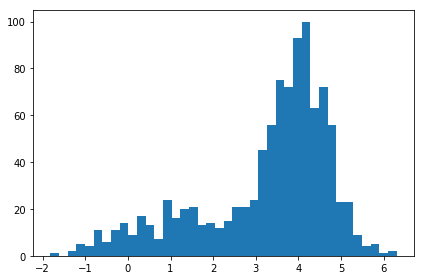

In [10]:
data=np.concatenate((x2,x1),axis=0)
#random.shuffle(x)
n_bins=40
fig, axs = plt.subplots(tight_layout=True)
hist=axs.hist(data, bins=n_bins)
plt.show()

In [12]:
mu_initial=np.array([0,3])
var_initial=np.array([.5,1])
pi_initial=np.array([.5,.5])
epsilon=0.01
Q_func_new=1
Q_func=0
C=2
counter=0;


In [6]:
x=data[:,0]
n=len(x)
try:
    d=len(x[0])
except:
    d=1
print(n,d)

1000 1


In [7]:
while (Q_func_new- Q_func)>epsilon:
    
    a_ij=np.zeros((n,C))
    h_ij=np.zeros((n,C))
    log_normal=np.zeros((n,C))
    for i in range(C):
        a_ij[:,i]=multivariate_normal.pdf(x,mu_initial[i],var_initial[i])
        
    for i in range(C):
        h_ij[:,i]=(a_ij[:,i]*pi_initial[i])/np.matmul(a_ij,pi_initial)
        
    for i in range(C):
        log_normal[:,i]=np.log(multivariate_normal.pdf(x,mu_initial[i],var_initial[i])*pi_initial[i])
        
    
    Q_func=0
    
    for i in range(C):
        Q_func+=np.dot(h_ij[:,i].T,log_normal[:,i])
        
    
    
    
    
    
   
    
    pi_initial=sum(h_ij)/n
    mu_initial=np.dot(h_ij.T,x)/sum(h_ij)
    s1=(x-mu_initial[0])**2
    s2=(x-mu_initial[1])**2
    var_initial=[np.dot(h_ij[:,0],s1)/sum(h_ij[:,0]),np.dot(h_ij[:,1],s2)/sum(h_ij[:,1])]
    var_initial
    
    log_normal=np.zeros((1000,2))
    for i in range(C):
        log_normal[:,i]=np.log(multivariate_normal.pdf(x,mu_initial[i],var_initial[i])*pi_initial[i])
        
    
    Q_func_new=0
    
    for i in range(C):
        Q_func_new+=np.dot(h_ij[:,i].T,log_normal[:,i])
        
    print(Q_func_new- Q_func)

    

552.3692254973253
8.596871631333215
6.88357179321406
4.711004377031713
2.891790515519233
1.7123852432218882
1.0248904306661188
0.6310936801812659
0.40108342553139664
0.26249888227380325
0.17625207230980777
0.12094543195985352
0.08452953711889677
0.059997265220317786
0.04314291237619727
0.031367094377174
0.02302009176264619
0.01702983848781514
0.012684879578728214
0.009504220995495416


In [8]:
print("weights: " ,pi_initial)
print("means: ",mu_initial)
print("variances:",var_initial)

weights:  [0.25299737 0.74700263]
means:  [1.02742034 4.0281385 ]
variances: [1.283622138516594, 0.4755340756264432]


In [9]:
x.shape

(1000,)